<a href="https://colab.research.google.com/github/anesu-rirwa/anesurirwa/blob/main/Fifa_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## ANESU RIRWA
## R204432D
## Artificial Intelligence And Machine Learning (HAI)
## HAI203

In [6]:
import matplotlib.pyplot as plt
import types
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df_data = pd.read_csv('players_20.csv')

df_data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,...,46,48,28,25,39,41,45,50,52,5,5,13,5,14,

In [7]:
#Data Cleaning

df_fifa = df_data[['short_name', 'age', 'overall', 'potential','nationality', 'club', 'value_eur']]
df_fifa.drop_duplicates(inplace = True)
df_fifa.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,short_name,age,overall,potential,nationality,club,value_eur
0,L. Messi,32,94,94,Argentina,FC Barcelona,95500000
1,Cristiano Ronaldo,34,93,93,Portugal,Juventus,58500000
2,Neymar Jr,27,92,92,Brazil,Paris Saint-Germain,105500000
3,J. Oblak,26,91,93,Slovenia,Atlético Madrid,77500000
4,E. Hazard,28,91,91,Belgium,Real Madrid,90000000


In [8]:
# DATA EXPLORATION

df_fifa.corr()
df_fifa.describe()

,age,overall,potential,value_eur
count,18278.000000,18278.000000,18278.000000,1.827800e+04
mean,25.283291,66.244994,71.546887,2.484038e+06
std,4.656964,6.949953,6.139669,5.585481e+06
min,16.000000,48.000000,49.000000,0.000000e+00
25%,22.000000,62.000000,67.000000,3.250000e+05
50%,25.000000,66.000000,71.000000,7.000000e+05
75%,29.000000,71.000000,75.000000,2.100000e+06
max,42.000000,94.000000,95.000000,1.055000e+08


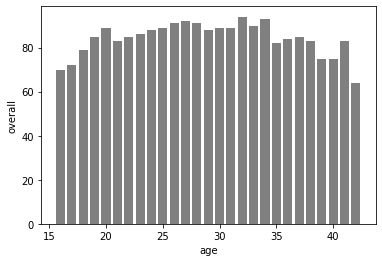

In [9]:
plt.bar('age', 'overall', data = df_fifa, color = 'grey')
plt.xlabel('age')
plt.ylabel('overall')
plt.show()

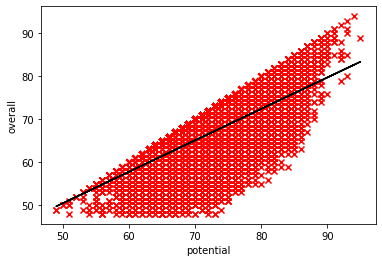

In [10]:
line1 = linear_model.LinearRegression()

df_Potential = df_fifa.loc[:, 'potential'].values.reshape(-1, 1)
df_Overall = df_fifa.loc[:, 'overall'].values.reshape(-1, 1)

line1.fit(df_Potential, df_Overall)
pred1 = line1.predict(df_Potential)

plt.scatter('potential', 'overall', data = df_fifa, marker = 'x', color = 'red')
plt.xlabel('potential')
plt.ylabel('overall')
plt.plot(df_Potential, pred1, color='black')
plt.show()

In [11]:
#Modelling
import numpy as np
split = np.random.rand(len(df_fifa)) < 0.75
train = df_fifa[split]
test = df_fifa[~split]

In [12]:
regr = linear_model.LinearRegression()

In [13]:
#Training the model

fifa_x_train = train[['age', 'potential']]
fifa_y_train = train[['overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly = poly.fit_transform(fifa_x_train)

regr.fit(fifa_x_train_poly, fifa_y_train)

LinearRegression()

In [14]:
#Testing the model
fifa_x_test = test[['age', 'potential']]
fifa_y_test = test[['overall']]
fifa_x_test_poly = poly.fit_transform(fifa_x_test)

In [15]:
df_fifa_pred = regr.predict(fifa_x_test_poly)

In [16]:
r2_score(fifa_y_test, df_fifa_pred)

0.948160657343225

In [17]:
fifa_x_test['Predicted Rating'] = df_fifa_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_fifa1 = pd.merge(df_fifa, fifa_x_test)
df_fifa1.head(20)

,short_name,age,overall,potential,nationality,club,value_eur,Predicted Rating
0,Cristiano Ronaldo,34,93,93,Portugal,Juventus,58500000,92.919923
1,Neymar Jr,27,92,92,Brazil,Paris Saint-Germain,105500000,91.377338
2,M. ter Stegen,27,90,93,Germany,FC Barcelona,67500000,92.615821
3,K. Mbappé,20,89,95,France,Paris Saint-Germain,93500000,87.725764
4,S. Agüero,31,89,89,Argentina,Manchester City,60000000,88.834124
5,R. Sterling,24,88,90,England,Manchester City,73000000,86.232436
6,Bernardo Silva,24,87,90,Portugal,Manchester City,64000000,86.232436
7,M. Škriniar,24,86,90,Slovakia,Inter,52000000,86.232436
8,S. Milinković-Savić,24,85,90,Serbia,Lazio,50500000,86.232436
9,C. Eriksen,27,88,89,Denmark,Tottenham Hotspur,68000000,87.857681


In [19]:
df_fifa_pred2 = regr.predict(fifa_x_train_poly)

In [20]:
fifa_x_train['Predicted Ratings'] = df_fifa_pred2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_fifa2 = pd.merge(df_fifa, fifa_x_train)
df_fifa2.drop_duplicates(inplace = True)
df_fifa2.head(20)

,short_name,age,overall,potential,nationality,club,value_eur,Predicted Ratings
0,L. Messi,32,94,94,Argentina,FC Barcelona,95500000,94.141109
1,J. Oblak,26,91,93,Slovenia,Atlético Madrid,77500000,92.063959
2,E. Hazard,28,91,91,Belgium,Real Madrid,90000000,90.609530
5,K. De Bruyne,28,91,91,Belgium,Manchester City,90000000,90.609530
8,K. Koulibaly,28,89,91,Senegal,Napoli,67500000,90.609530
11,V. van Dijk,27,90,91,Netherlands,Liverpool,78000000,90.173553
12,L. Modrić,33,90,90,Croatia,Real Madrid,45000000,89.706254
13,M. Salah,27,90,90,Egypt,Liverpool,80500000,89.001331
14,H. Kane,25,89,91,England,Tottenham Hotspur,83000000,88.652120
16,Ederson,25,88,91,Brazil,Manchester City,54500000,88.652120
